In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from data import MePicsSet
from display import show_keypoints
import torch
from torch.utils.data import DataLoader
from learn import test
import numpy as np
import morph, utils
from pathlib import Path
import my_types as mt

In [28]:
OUT_DIR = Path("output")

In [85]:
april_dataset = MePicsSet()
april_loader = DataLoader(april_dataset, batch_size=8, shuffle=False)

In [111]:
model3_path = max(OUT_DIR.glob("model3*"), key=lambda p: Path(p).stat().st_mtime)
model3 = torch.load(model3_path, map_location="cpu")
print(f"loaded {model3_path}")

loaded output/model3.pt


In [129]:
april_imgs, april_preds = test(april_loader, model3)

In [130]:
april_preds[0]

tensor([[0.0726, 0.4162],
        [0.0779, 0.4958],
        [0.0998, 0.5744],
        [0.1350, 0.6601],
        [0.1843, 0.7420],
        [0.2651, 0.7971],
        [0.3477, 0.8396],
        [0.4380, 0.8852],
        [0.5291, 0.8872],
        [0.6213, 0.8702],
        [0.7127, 0.8257],
        [0.7827, 0.7619],
        [0.8435, 0.6936],
        [0.8797, 0.6066],
        [0.8946, 0.5209],
        [0.8956, 0.4236],
        [0.8901, 0.3333],
        [0.1320, 0.2966],
        [0.1636, 0.2706],
        [0.2300, 0.2331],
        [0.2924, 0.2575],
        [0.3853, 0.2598],
        [0.4997, 0.2715],
        [0.5838, 0.2345],
        [0.6702, 0.2096],
        [0.7347, 0.2219],
        [0.8081, 0.2621],
        [0.4628, 0.3440],
        [0.4831, 0.3985],
        [0.4581, 0.4451],
        [0.4873, 0.4956],
        [0.3969, 0.5421],
        [0.4275, 0.5761],
        [0.4915, 0.5590],
        [0.5480, 0.5661],
        [0.5690, 0.5348],
        [0.2078, 0.3614],
        [0.2525, 0.3319],
        [0.3

In [131]:
# for i, p in zip(april_imgs, april_preds):
#     show_keypoints(image=i, truth_points=None, pred_points=p)

tensor([1.1144e+11, 8.4479e+04], device='cuda:0')


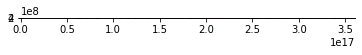

tensor([0.0768, 0.2983], device='cuda:0')


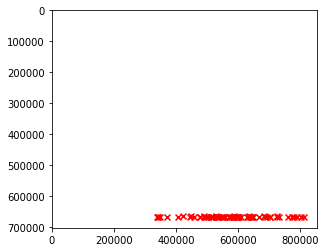

tensor([0.0838, 0.4135], device='cuda:0')


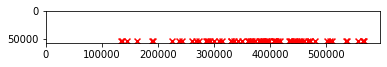

tensor([0.1120, 0.2742], device='cuda:0')


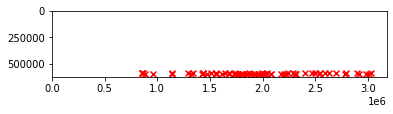

tensor([0.0957, 0.3999], device='cuda:0')


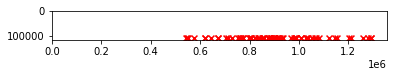

tensor([0.0979, 0.4252], device='cuda:0')


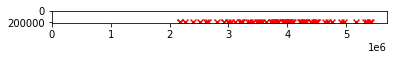

tensor([0.0949, 0.3887], device='cuda:0')


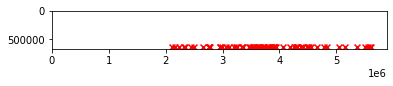

tensor([0.1255, 0.3784], device='cuda:0')


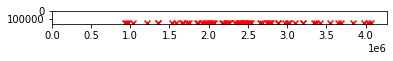

tensor([0.1220, 0.3579], device='cuda:0')


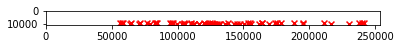

tensor([0.0928, 0.2851], device='cuda:0')


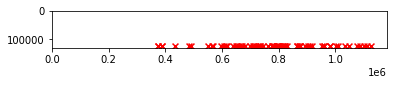

tensor([0.0935, 0.4615], device='cuda:0')


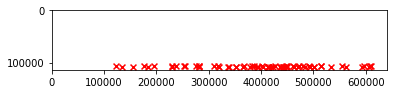

tensor([0.0770, 0.3998], device='cuda:0')


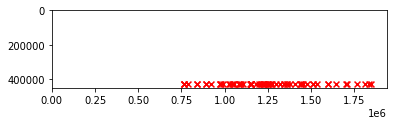

tensor([0.0982, 0.3676], device='cuda:0')


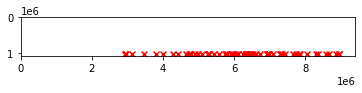

tensor([0.0836, 0.3912], device='cuda:0')


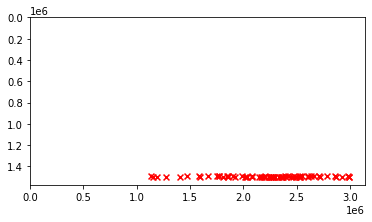

tensor([0.1357, 0.3963], device='cuda:0')


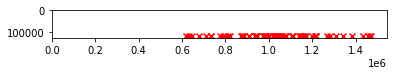

tensor([0.0594, 0.3464], device='cuda:0')


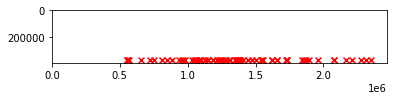

In [139]:
for i in range(len(april_dataset)):
    im = april_dataset.get_original_img(i)
    h, w, _ = im.shape
    print(april_preds[i][0])
#     r = mt.to_ratios(april_preds[i], h, w)
#     print(r[i])
    r = april_preds[i]
    p = april_dataset.get_original_pts(i, r)
    show_keypoints(image=im, truth_points=None, pred_points=p, ratio=False)

In [48]:
import data, my_types
import my_types as mt

morph_imgs = []
morph_pts = []
corners = np.array([[0, 0], [0, 499/500], [499/500, 0], [499/500, 499/500]])
# for i in range(len(april_dataset)):
for i in [0, 1]:
    im = mt.to_img_arr(april_dataset.get_morph_img(i))
    morph_imgs.append(im)

    pred_pts = mt.to_points(april_preds[i])
    pts = april_dataset.get_morph_pts(i, pred_pts)
    # pts = np.vstack((pred_pts, corners))
#     my_types.assert_points(pts)
    morph_pts.append(pts)
    
    print(im.shape)
    show_keypoints(im, pts, color=True)


middle, _, _ = morph.compute_middle_object(
    morph_imgs[0], morph_imgs[1], morph_pts[0], morph_pts[1], alpha=0.5
)
plt.imshow(middle)

AssertionError: points are not ratios 1.5451016426086426, 5.947823524475098

In [ ]:
filename = OUT_DIR / f"morph_{time.time()}.mp4"

me1, me2 = morph_imgs[0], morph_imgs[1]
pts1, pts2 = morph_pts[0], morph_pts[1]
# morph.compute_middle_object(me1, me2, pts1, pts2, alpha=0.5)
# morph.compute_morph_video(me1, me2, pts1, pts2, filename)